In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
import torch.optim as optim

In [43]:
def load_fashion_mnist(data_dir):
    # Load training data
    train_df = pd.read_csv(f'{data_dir}/fashion-mnist_train.csv')
    train_data = train_df.iloc[:, 1:].values  # Pixel values (all columns except the first)
    train_labels = train_df.iloc[:, 0].values  # Labels (first column)

    # Load test data
    test_df = pd.read_csv(f'{data_dir}/fashion-mnist_test.csv')
    test_data = test_df.iloc[:, 1:].values  # Pixel values (all columns except the first)
    test_labels = test_df.iloc[:, 0].values  # Labels (first column)

    # Reshape data to (num_samples, 28, 28) for images
    train_data = train_data.reshape(-1, 28, 28)
    test_data = test_data.reshape(-1, 28, 28)

    return train_data, train_labels, test_data, test_labels

# Load the dataset
data_dir = '/kaggle/input/fashionmnist'
train_data, train_labels, test_data, test_labels = load_fashion_mnist(data_dir)

# Print shapes to verify
print("Train data shape:", train_data.shape)
print("Train labels shape:", train_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

Train data shape: (60000, 28, 28)
Train labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [44]:
train_data = train_data.reshape(60000, 28, 28, 1)
test_data = test_data.reshape(10000, 28, 28, 1)

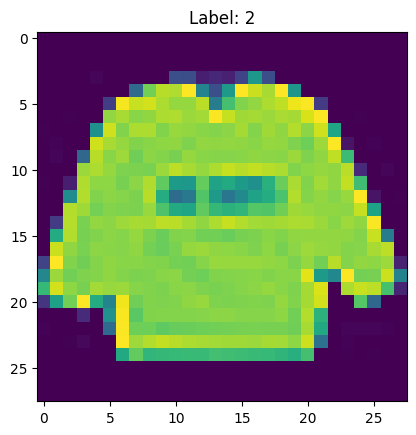

In [45]:
import matplotlib.pyplot as plt

# Display the first training image
plt.imshow(train_data[0])
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [46]:
# Normalize the data
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

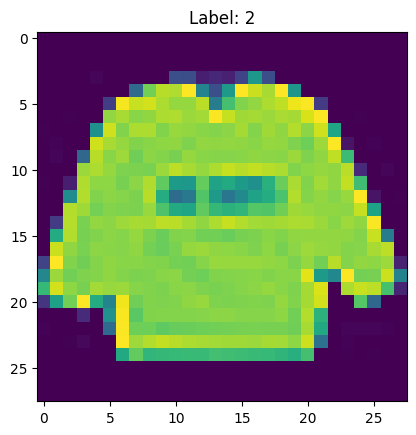

In [47]:
plt.imshow(train_data[0])
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [48]:
train_data_tensor = torch.tensor(train_data).float()  # No need to squeeze
train_labels_tensor = torch.tensor(train_labels).long()

test_data_tensor = torch.tensor(test_data).float()  
test_labels_tensor = torch.tensor(test_labels).long()
print("Train data shape:", train_data.shape)
print("Train labels shape:", train_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

Train data shape: (60000, 28, 28, 1)
Train labels shape: (60000,)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


In [49]:
train_dataset=TensorDataset(train_data_tensor,train_labels_tensor)
test_dataset=TensorDataset(test_data_tensor,test_labels_tensor)

#dataleader

train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [50]:
for images,labels in train_loader:
    print("batch of images shape",images.shape)
    print("batch of labels:", labels)
    break

batch of images shape torch.Size([32, 28, 28, 1])
batch of labels: tensor([2, 4, 3, 2, 8, 8, 8, 5, 6, 0, 8, 4, 5, 6, 6, 2, 7, 2, 3, 1, 8, 7, 7, 2,
        9, 9, 0, 4, 9, 2, 0, 8])


In [51]:
train_data_tensor = train_data_tensor/255.0
test_data_tensor = test_data_tensor/255.0

In [52]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)  # Conv Layer 1
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1) # Conv Layer 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling
        
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Fully connected layer 1
        self.fc2 = nn.Linear(128, num_classes) # Output layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool
        
        x = x = x.reshape(x.size(0), -1)   # Flatten
        x = F.relu(self.fc1(x))    # FC1 -> ReLU
        x = self.fc2(x)            # FC2 (Output)
        
        return x

# Model Instantiation
model = CNN()
print(model)


CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.permute(0, 3, 1, 2)  # Reorder input dimensions
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.009
Epoch 1, Batch 200, Loss: 0.613
Epoch 1, Batch 300, Loss: 0.525
Epoch 1, Batch 400, Loss: 0.464
Epoch 1, Batch 500, Loss: 0.466
Epoch 1, Batch 600, Loss: 0.424
Epoch 1, Batch 700, Loss: 0.397
Epoch 1, Batch 800, Loss: 0.376
Epoch 1, Batch 900, Loss: 0.362
Epoch 1, Batch 1000, Loss: 0.363
Epoch 1, Batch 1100, Loss: 0.336
Epoch 1, Batch 1200, Loss: 0.356
Epoch 1, Batch 1300, Loss: 0.341
Epoch 1, Batch 1400, Loss: 0.334
Epoch 1, Batch 1500, Loss: 0.327
Epoch 1, Batch 1600, Loss: 0.335
Epoch 1, Batch 1700, Loss: 0.295
Epoch 1, Batch 1800, Loss: 0.309
Epoch 2, Batch 100, Loss: 0.301
Epoch 2, Batch 200, Loss: 0.296
Epoch 2, Batch 300, Loss: 0.288
Epoch 2, Batch 400, Loss: 0.297
Epoch 2, Batch 500, Loss: 0.293
Epoch 2, Batch 600, Loss: 0.291
Epoch 2, Batch 700, Loss: 0.276
Epoch 2, Batch 800, Loss: 0.279
Epoch 2, Batch 900, Loss: 0.245
Epoch 2, Batch 1000, Loss: 0.294
Epoch 2, Batch 1100, Loss: 0.262
Epoch 2, Batch 1200, Loss: 0.260
Epoch 2, Batch 1300, Loss: 0

In [54]:
model.eval()  # Set the model to evaluation mode
test_correct = 0
test_total = 0

with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        images = images.permute(0, 3, 1, 2)  # Use images here, not inputs
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 92.72%


In [55]:
import torch
from sklearn.svm import SVC

# Convert train_data to PyTorch tensor if it's a numpy array
train_data_tensor = torch.tensor(train_data).float()  # Convert to float tensor

# Ensure the correct shape: [batch_size, channels, height, width]
train_data_tensor = train_data_tensor.permute(0, 3, 1, 2)  # If the data is in HWC format, permute to CHW

# Extract features using the CNN
class FeatureExtractor(nn.Module):
    def __init__(self, cnn):
        super(FeatureExtractor, self).__init__()
        self.cnn = cnn
        self.cnn.fc2 = nn.Identity()  # Remove the last layer

    def forward(self, x):
        return self.cnn(x)

# Create the feature extractor
feature_extractor = FeatureExtractor(model)
feature_extractor.eval()

# Extract features for training data (without gradients)
with torch.no_grad():
    train_features = feature_extractor(train_data_tensor)
    train_features = train_features.view(train_features.size(0), -1)  # Flatten the features

# Convert features to numpy for SVM
train_features = train_features.numpy()

# Train an SVM on the extracted features
svm = SVC()
svm.fit(train_features, train_labels)


SVC()

In [56]:

from sklearn.metrics import accuracy_score

test_data_tensor = torch.tensor(test_data).float()  # Convert to float tensor
print(f"test_data_tensor shape after conversion: {test_data_tensor.shape}")

test_data_tensor = test_data_tensor.permute(0, 3, 1, 2) 
print(f"test_data_tensor shape after permute: {test_data_tensor.shape}")

with torch.no_grad():
    test_features = feature_extractor(test_data_tensor)
    print(f"test_features shape after passing through CNN: {test_features.shape}")
    
    # Flatten the features
    test_features = test_features.view(test_features.size(0), -1)
    print(f"test_features shape after flattening: {test_features.shape}")

test_features = test_features.numpy()

svm_predictions = svm.predict(test_features)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(test_labels, svm_predictions)
print(f"SVM Test Accuracy: {test_accuracy * 100:.2f}%")

# Optionally, print some of the predictions and the corresponding true labels
print(f"First 5 true labels: {test_labels[:5]}")
print(f"First 5 predictions: {svm_predictions[:5]}")

# Print classification report if needed
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(test_labels, svm_predictions))


test_data_tensor shape after conversion: torch.Size([10000, 28, 28, 1])
test_data_tensor shape after permute: torch.Size([10000, 1, 28, 28])
test_features shape after passing through CNN: torch.Size([10000, 128])
test_features shape after flattening: torch.Size([10000, 128])
SVM Test Accuracy: 92.99%
First 5 true labels: [0 1 2 2 3]
First 5 predictions: [0 1 2 2 3]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.87      0.88      1000
           3       0.92      0.95      0.93      1000
           4       0.88      0.91      0.89      1000
           5       0.99      0.98      0.99      1000
           6       0.81      0.79      0.80      1000
           7       0.97      0.97      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.97      0.97      0.97      1000

    accuracy 